In [64]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv("C:\\Users\\Admin\\Desktop\\IA\\logistic_regression_dataset.csv")
df.head()
df.head(-5)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,4228,47,NaN,F,NO,0.0,0.0,0,0,0,279.0,154.5,103.5,27.12,79.0,60.0,NaN
4229,4229,47,1.0,F,NO,0.0,0.0,0,0,0,278.0,156.0,96.0,27.86,80.0,70.0,NaN
4230,4230,67,1.0,M,NO,0.0,0.0,0,0,0,203.0,122.0,74.0,15.54,96.0,79.0,NaN
4231,4231,62,1.0,M,YES,20.0,0.0,0,1,0,270.0,145.5,87.5,23.88,81.0,67.0,NaN


In [65]:
df['TenYearCHD'].fillna(df['TenYearCHD'].mean(), inplace=True)


In [66]:
df.isnull().sum()

id                   0
age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [67]:
df['TenYearCHD'] = df['TenYearCHD'].astype(int) 
display(df['TenYearCHD'].dtypes) 




dtype('int32')

In [63]:
x = df[['id']]
y = df['TenYearCHD']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

logreg = LogisticRegression()   
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.86


<Axes: xlabel='Predicted', ylabel='Actual'>

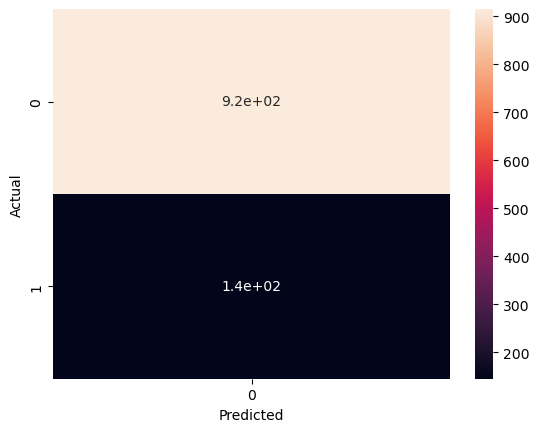

In [69]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

- The ROC curve is a graphical representation of the model's performance across different classification thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1-specificity). The curve is useful for evaluating the model's ability to discriminate between classes.

- AUC is a single scalar value that summarizes the performance of the model. It ranges from 0 to 1, with higher values indicating better performance. An AUC of 0.5 represents random guessing, while an AUC of 1 represents a perfect classifier.

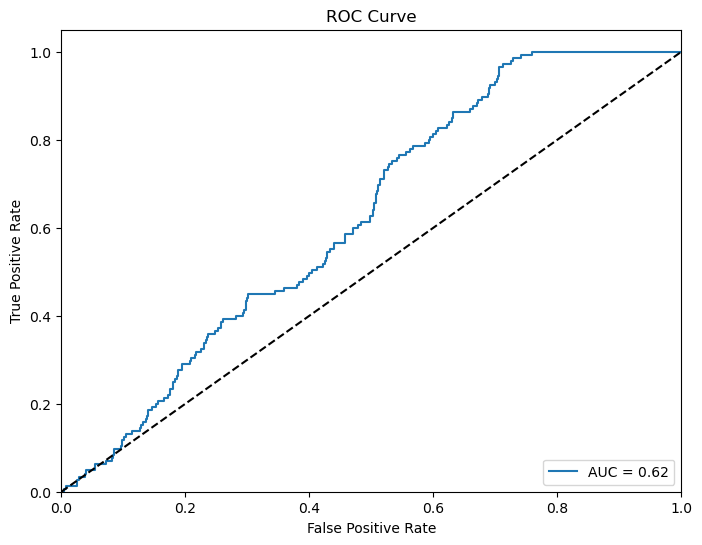

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

# Calculate AUC
auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:,1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
